## Contexto
"Predecir el comportamiento para retener a los clientes. Puede analizar todos los datos relevantes de los clientes y desarrollar programas de retención de clientes enfocados". [Conjuntos de datos de muestra de IBM]

## Contenido
Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre:

- Clientes que se fueron en el último mes: la columna se llama Rotación
- Servicios a los que se ha registrado cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen parejas y dependientes.

# EDA and Prediction

La deserción es uno de los mayores problemas en la industria de las telecomunicaciones. Las investigaciones han demostrado que la tasa de abandono mensual promedio entre los 4 principales proveedores de servicios inalámbricos de EE. UU. es del 1,9 % al 2 %.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data files are available in the "../input/" directory.

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Leamos el archivo de datos en el cuaderno de Python**

In [4]:
telecom_cust = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\MATEMÁTICA Y ESTADÍSTICA EN CIENCIA DE DATOS\codigo\base de datos\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Exploremos los datos para ver si falta algún valor.**

In [6]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Después de observar el resultado anterior, podemos decir que faltan 11 valores para Cargos totales. Reemplacemos y eliminemos estas 11 filas de nuestro conjunto de datos.

In [8]:
#Removing missing values
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:] #eliminar la variable ID
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True) #remplazar  el valor de yes a 1
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

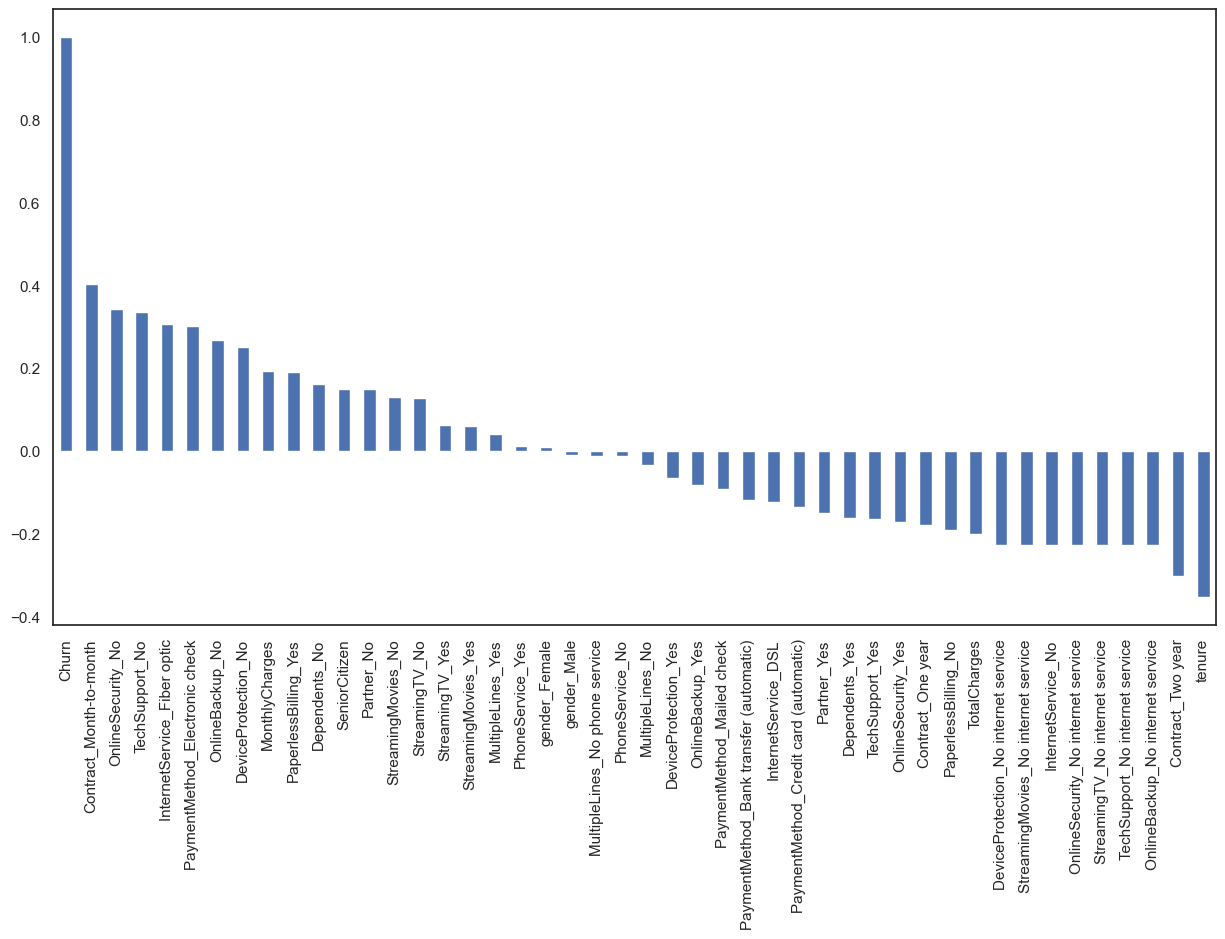

In [9]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Los contratos mensuales, la ausencia de seguridad en línea y soporte técnico parecen estar correlacionados positivamente con la deserción. Mientras que los contratos de permanencia y de dos años parecen estar correlacionados negativamente con la deserción.

Curiosamente, servicios como seguridad en línea, transmisión de TV, respaldo en línea, soporte técnico, etc. sin conexión a Internet parecen estar relacionados negativamente con la deserción.

Exploraremos los patrones de las correlaciones anteriores a continuación antes de profundizar en el modelado y la identificación de las variables importantes.

## Exploración de datos

Primero comencemos explorando nuestro conjunto de datos, para comprender mejor los patrones en los datos y potencialmente formular alguna hipótesis. Primero veremos la distribución de variables individuales y luego analizaremos nuestros datos en busca de tendencias interesantes.

**A.)** ***Datos demográficos***: primero comprendamos el género, rango de edad, pareja y estado dependiente de los clientes.

1. **Distribución por género**: aproximadamente la mitad de los clientes de nuestro conjunto de datos son hombres, mientras que la otra mitad son mujeres.

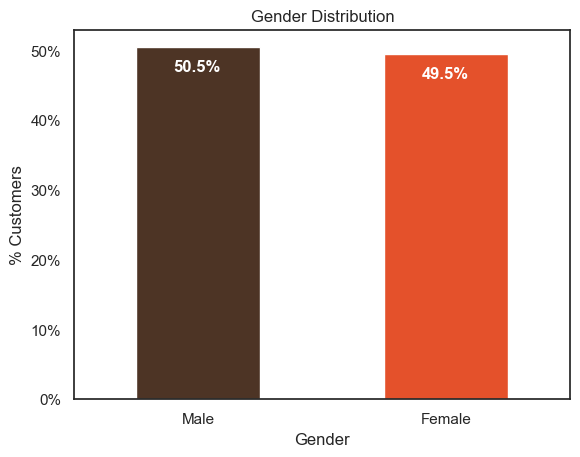

In [10]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. **% de personas mayores**: solo el 16% de los clientes son personas mayores. Por lo tanto, la mayoría de nuestros clientes en los datos son personas más jóvenes.


Text(0.5, 1.0, '% of Senior Citizens')

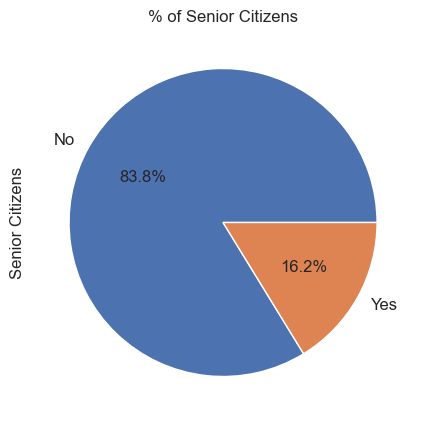

In [11]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Estado de socio y dependiente**: alrededor del 50 % de los clientes tienen un socio, mientras que solo el 30 % del total de clientes tienen dependientes.

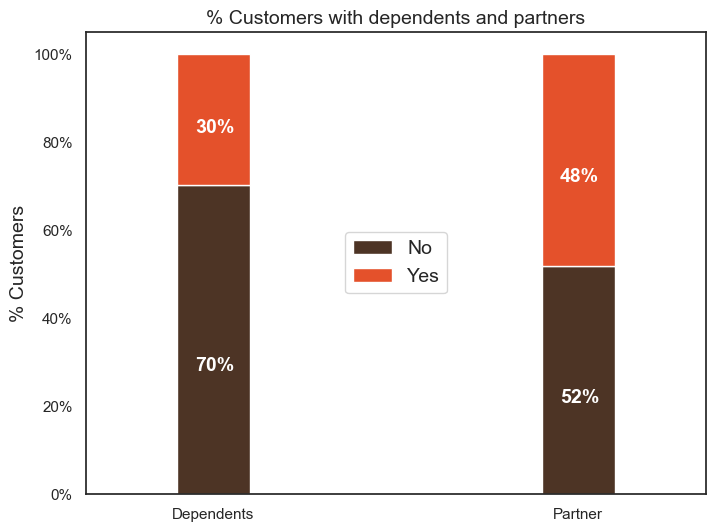

In [12]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Lo que sería interesante es ver el % de clientes que tienen socios y también tienen dependientes. Exploraremos esto a continuación.**

Curiosamente, entre los clientes que tienen una pareja, sólo alrededor de la mitad tienen también un dependiente, mientras que la otra mitad no tiene ningún independiente.
Además, como era de esperar, entre los clientes que no tienen pareja, la mayoría (80%) no tiene dependientes.

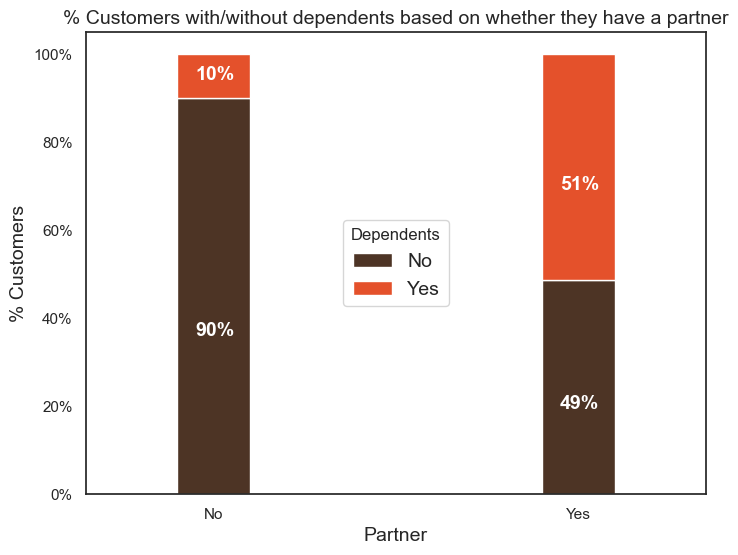

In [13]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

También analicé las diferencias entre el porcentaje de clientes con/sin dependientes y socios por género. No hay diferencia en su distribución por género. Además, no existe diferencia en la condición de persona mayor por género.

### B.) **Información de la cuenta del cliente**: Veamos ahora la tenencia y el contrato.

**1. Antigüedad:** Después de observar el histograma a continuación, podemos ver que muchos clientes han estado en la empresa de telecomunicaciones durante solo un mes, mientras que muchos están allí durante aproximadamente 72 meses. Esto podría deberse potencialmente a que diferentes clientes tienen contratos diferentes. Por lo tanto, según el contrato que tengan, podría ser más o menos fácil para los clientes quedarse o abandonar la empresa de telecomunicaciones.

Text(0.5, 1.0, '# of Customers by their tenure')

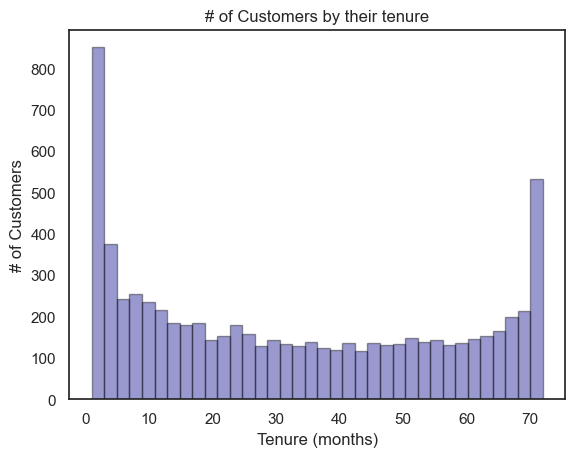

In [14]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

**2. Contratos:** Para comprender el gráfico anterior, veamos primero el número de clientes por diferentes contratos.

Text(0.5, 1.0, '# of Customers by Contract Type')

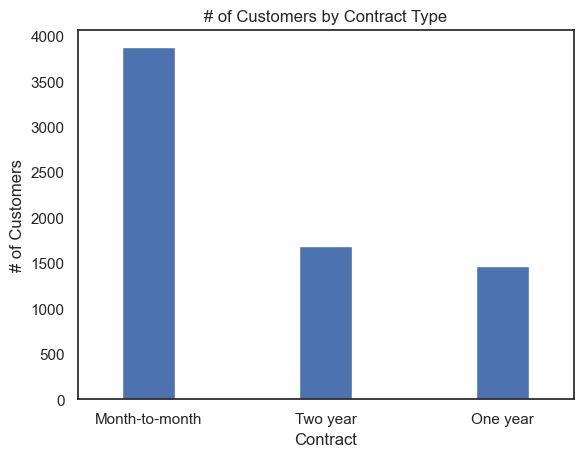

In [15]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Como podemos ver en este gráfico, la mayoría de los clientes tienen contrato mes a mes. Si bien hay el mismo número de clientes en los contratos de 1 año y 2 años.


A continuación entenderemos la tenencia de los clientes según su tipo de contrato.

Text(0.5, 1.0, 'Two Year Contract')

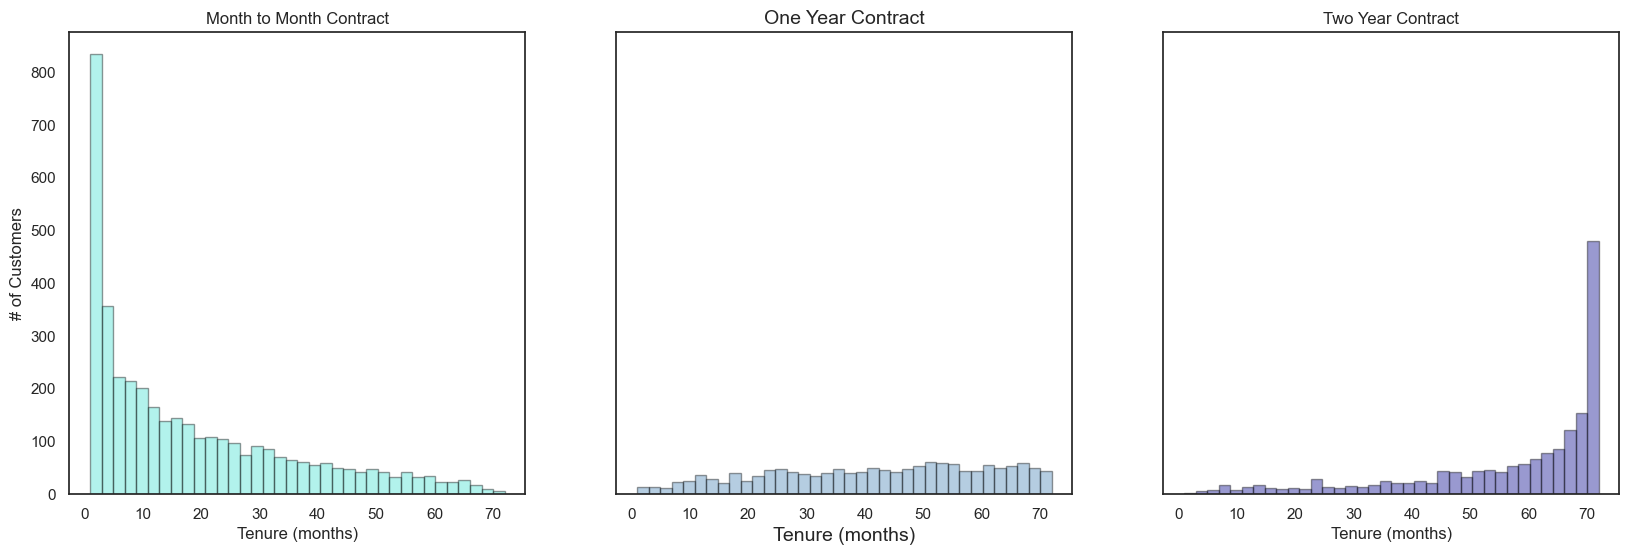

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Curiosamente, la mayoría de los contratos mensuales duran entre 1 y 2 meses, mientras que los contratos de 2 años tienden a durar unos 70 meses. Esto demuestra que los clientes que aceptan un contrato más largo son más leales a la empresa y tienden a permanecer en ella durante un período de tiempo más largo.

Esto es también lo que vimos en el gráfico anterior sobre la correlación con la tasa de abandono.

###  C. Let us now look at the distribution of various services used by customers

In [9]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

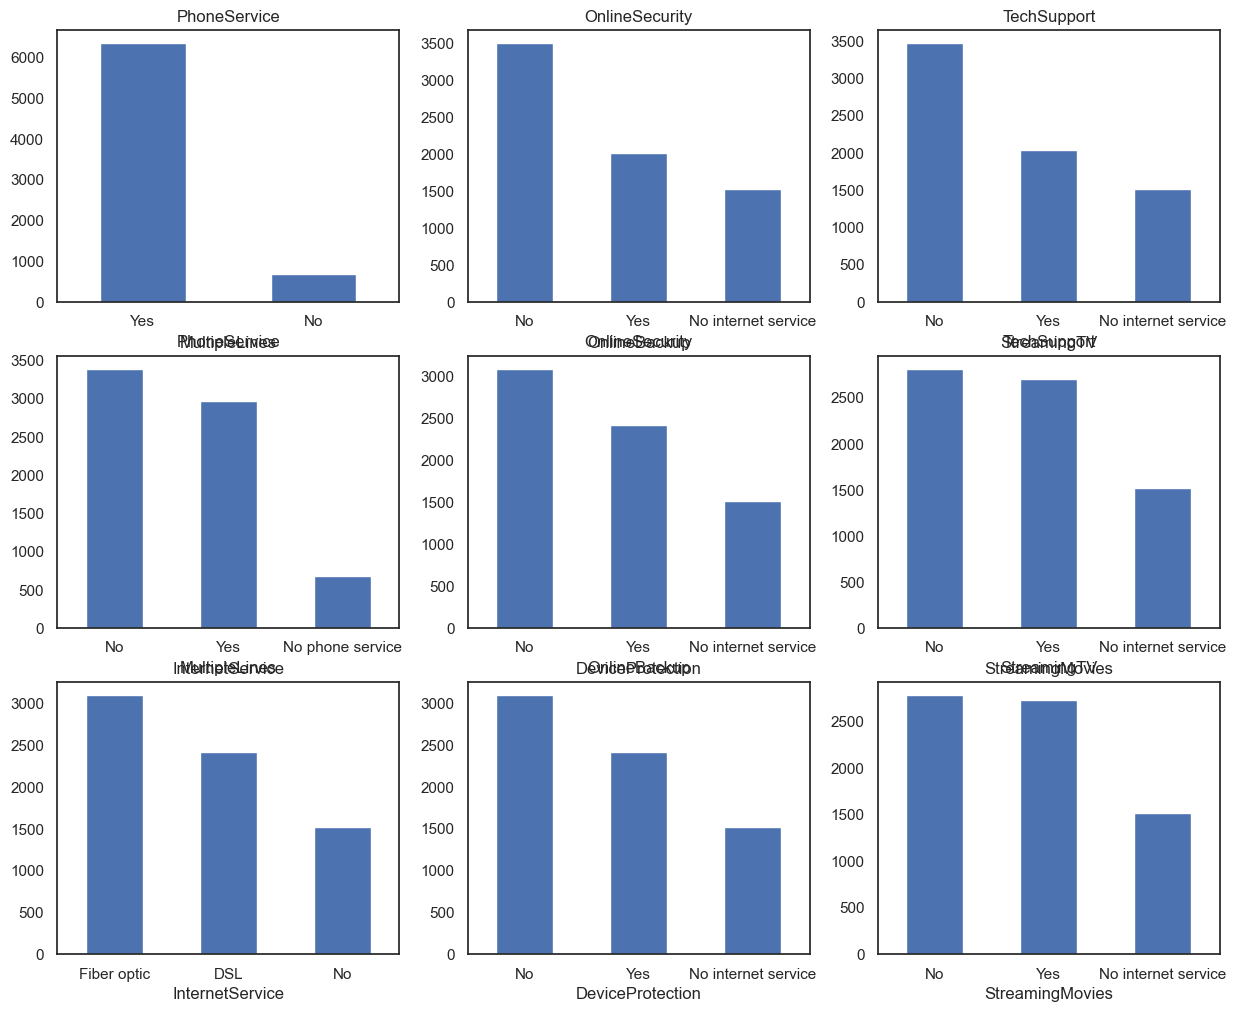

In [18]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### D.) Ahora echemos un vistazo rápido a la relación entre los cargos mensuales y totales.

Observaremos que los cargos totales aumentan a medida que aumenta la factura mensual de un cliente.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

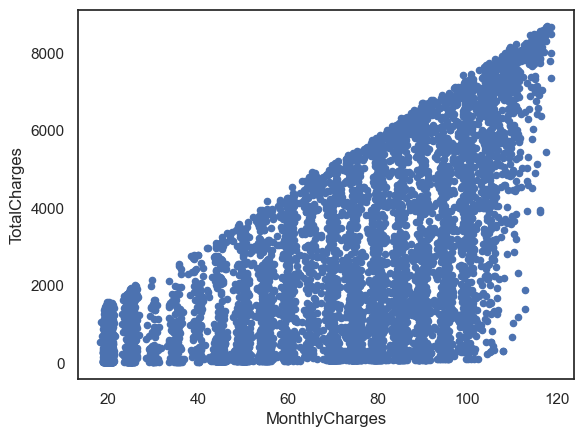

In [19]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

### E.) Finalmente, echemos un vistazo a nuestra variable predictiva (Churn) y comprendamos su interacción con otras variables importantes como se descubrió en el gráfico de correlación.

1. Veamos primero la tasa de abandono de nuestros datos.

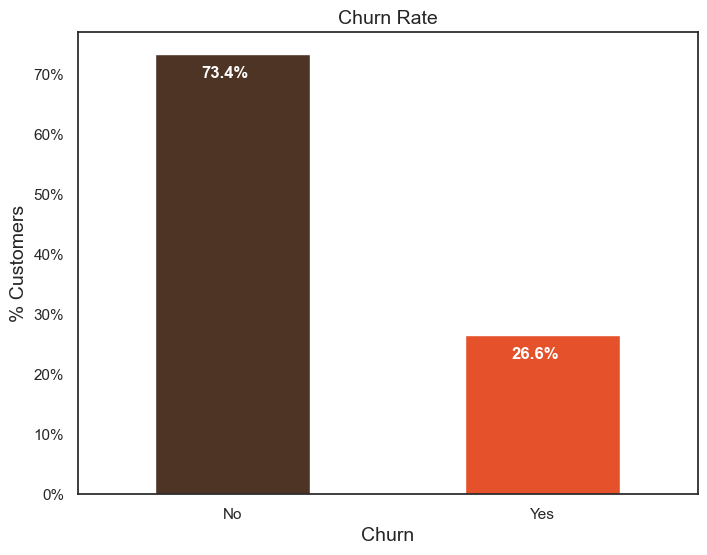

In [20]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12, # Remove the 'size' argument
            color='white',
           weight = 'bold',
           )

Según nuestros datos, el 74% de los clientes no abandonan. Claramente, los datos están sesgados, ya que esperaríamos que una gran mayoría de los clientes no abandonaran. Es importante tener esto en cuenta para nuestro modelado, ya que la asimetría podría generar muchos falsos negativos. Veremos en la sección de modelado cómo evitar la asimetría en los datos.

2. Exploremos ahora la tasa de abandono por antigüedad, antigüedad, tipo de contrato, cargos mensuales y cargos totales para ver cómo varía según estas variables.

**i.) Abandono vs Permanencia**: Como podemos ver en el siguiente gráfico, los clientes que no abandonan tienden a permanecer por más tiempo en la empresa de telecomunicaciones.

<Axes: xlabel='Churn', ylabel='tenure'>

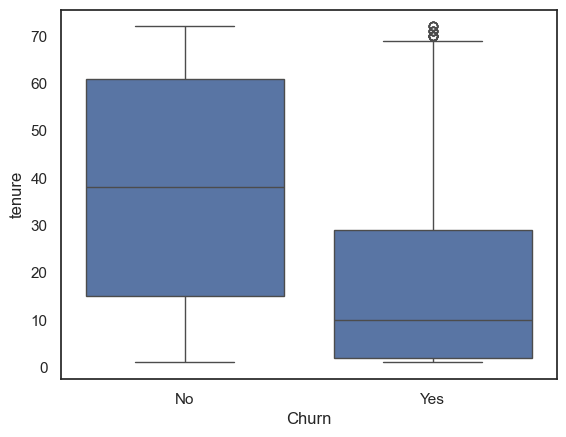

In [21]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii.) Rotación por tipo de contrato**: similar a lo que vimos en el gráfico de correlación, los clientes que tienen un contrato mes a mes tienen una tasa de rotación muy alta.

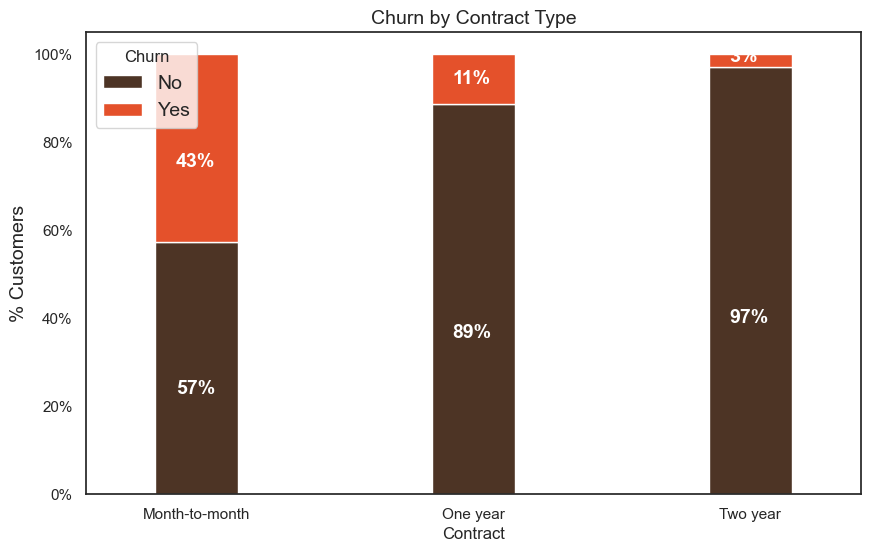

In [22]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**iii.) Rotación por antigüedad**: las personas mayores tienen casi el doble de tasa de rotación que la población más joven.

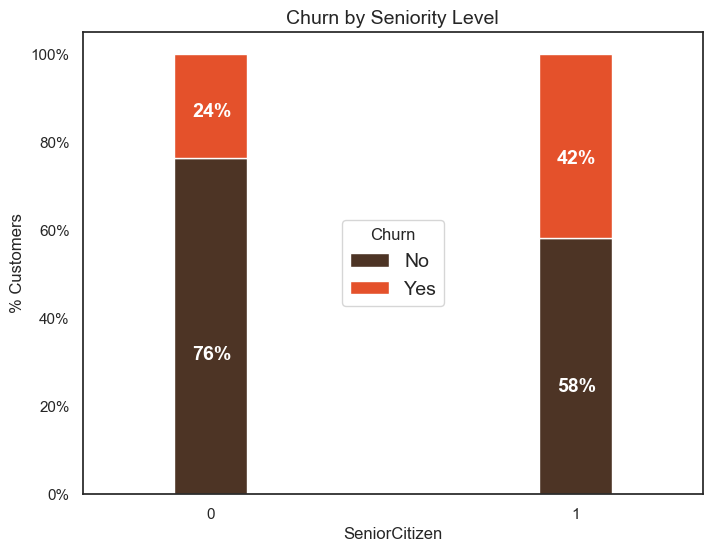

In [23]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Rotación por cargos mensuales**: mayor porcentaje de clientes que abandonan cuando los cargos mensuales son altos.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

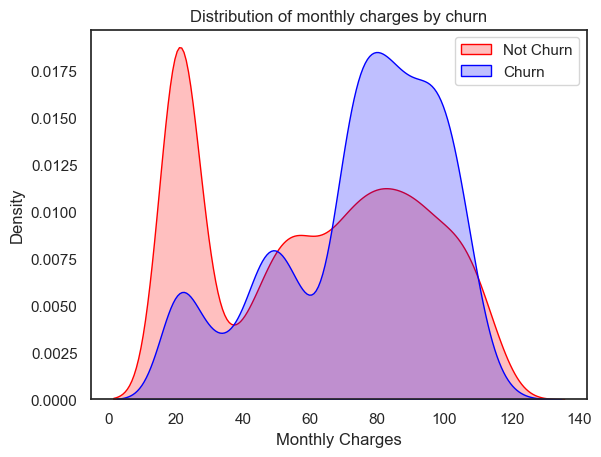

In [24]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**v.) Rotación por cargos totales**: Parece que hay mayor rotación cuando los cargos totales son menores.

Text(0.5, 1.0, 'Distribution of total charges by churn')

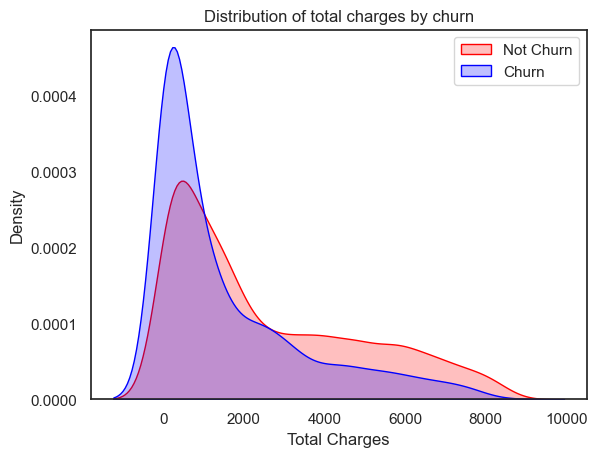

In [25]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## Después de revisar el EDA anterior, desarrollaremos algunos modelos predictivos y los compararemos.

Se usará la Logistic Regression

**1. Logistic Regression**

In [26]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [27]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Es importante escalar las variables en la regresión logística para que todas estén dentro de un rango de 0 a 1. Esto ayudó a mejorar la precisión del 79,7 % al 80,7 %. Además, notará a continuación que la importancia de las variables también está alineada con lo que estamos viendo en el algoritmo Random Forest y el EDA que realizamos anteriormente.

In [28]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [30]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


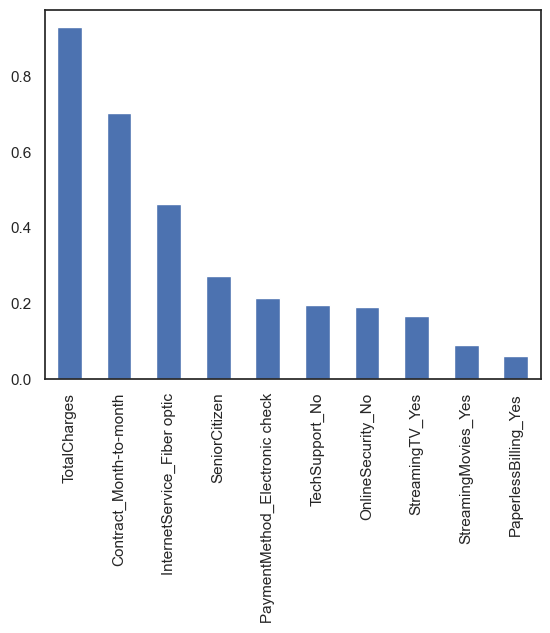

In [31]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


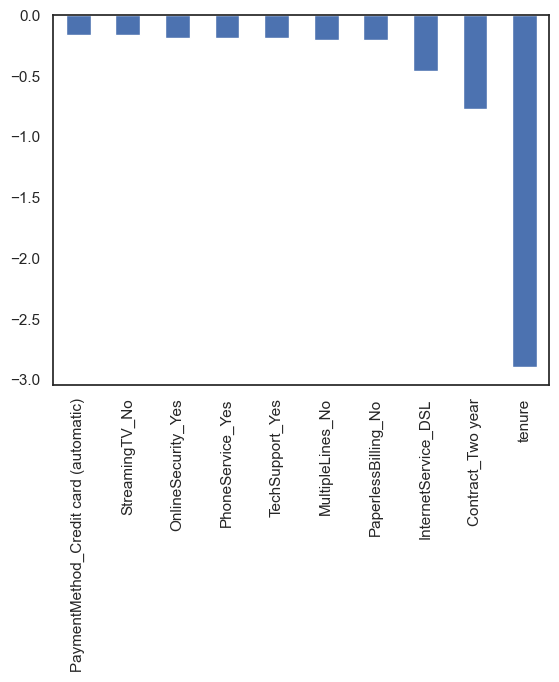

In [32]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Observaciones**

Podemos ver que algunas variables tienen una relación negativa con nuestra variable predicha (Churn), mientras que otras tienen una relación positiva. La relación negativa significa que la probabilidad de abandono disminuye con esa variable. Resumamos algunas de las características interesantes a continuación:
* Como vimos en nuestra EDA, tener un contrato de 2 meses reduce las posibilidades de abandono. El contrato de 2 meses junto con la permanencia tienen la relación más negativa con el abandono, según lo predicho por las regresiones logísticas.
* Tener servicio de internet DSL también reduce la probabilidad de Churn
* Por último, los cargos totales, los contratos mensuales, los servicios de Internet de fibra óptica y la antigüedad pueden generar tasas de abandono más altas. Esto es interesante porque, aunque los servicios de fibra óptica son más rápidos, es probable que los clientes abandonen sus servicios debido a ello. Creo que necesitamos explorar más para comprender mejor por qué sucede esto.

¡Cualquier hipótesis sobre lo anterior sería realmente útil!

---------

In [33]:
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix

def calculate_metrics(y_true, y_pred_prob, threshold=0.5):
    """
    Calcula las métricas AUC, Gini, F1-score y Recall para un modelo de regresión logística.

    Parameters:
    - y_true: array-like, Ground truth (correct) target values.
    - y_pred_prob: array-like, Predicted probabilities for the positive class.
    - threshold: float, Threshold for converting predicted probabilities to binary predictions.

    Returns:
    - metrics: dict, Dictionary containing AUC, Gini, F1-score and Recall.
    """
    # Calcular las predicciones binarias basadas en el umbral
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calcular AUC
    auc = roc_auc_score(y_true, y_pred_prob)

    # Calcular Gini
    gini = 2 * auc - 1

    # Calcular F1-score
    f1 = f1_score(y_true, y_pred)

    # Calcular Recall
    recall = recall_score(y_true, y_pred)

    # Guardar métricas en un diccionario
    metrics = {
        'AUC': auc,
        'Gini': gini,
        'F1-score': f1,
        'Recall': recall
    }

    return metrics

In [34]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet

def train_logistic_regression(X, y, C=1.0):
    """
    Entrena un modelo de regresión logística.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - C: float, Parámetro de regularización (menor valor significa una mayor regularización).

    Returns:
    - logistic_model: objeto, Modelo de regresión logística entrenado.
    """
    logistic_model = LogisticRegression(C=C)
    logistic_model.fit(X, y)
    return logistic_model

def train_ridge_classifier(X, y, alpha=1.0):
    """
    Entrena un modelo de clasificación Ridge.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alpha: float, Parámetro de regularización (mayor valor significa una mayor regularización).

    Returns:
    - ridge_model: objeto, Modelo de clasificación Ridge entrenado.
    """
    ridge_model = RidgeClassifier(alpha=alpha)
    ridge_model.fit(X, y)
    return ridge_model

def train_lasso_classifier(X, y, alpha=1.0):
    """
    Entrena un modelo de clasificación Lasso.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alpha: float, Parámetro de regularización (mayor valor significa una mayor regularización).

    Returns:
    - lasso_model: objeto, Modelo de clasificación Lasso entrenado.
    """
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    return lasso_model

def train_elasticnet_classifier(X, y, alpha=1.0, l1_ratio=0.5):
    """
    Entrena un modelo de clasificación Elastic Net.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alpha: float, Parámetro de regularización (mayor valor significa una mayor regularización).
    - l1_ratio: float, Proporción de la regularización L1 (0 significa solo L2, 1 significa solo L1).

    Returns:
    - elasticnet_model: objeto, Modelo de clasificación Elastic Net entrenado.
    """
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet_model.fit(X, y)
    return elasticnet_model


In [35]:
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LassoCV, ElasticNetCV

def find_best_logistic_params(X, y, Cs=10, cv=5):
    """
    Encuentra los mejores parámetros para la regresión logística utilizando LogisticRegressionCV.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - Cs: int o array-like, Número de valores de C a probar.
    - cv: int, Número de divisiones en la validación cruzada.

    Returns:
    - best_C: float, Mejor valor de C.
    - best_coef: array, Coeficientes estimados.
    - Cs: array, Valores de C probados.
    - cv_scores: array, Puntuaciones de la validación cruzada para cada valor de C.
    """
    # Inicializar el modelo LogisticRegressionCV
    logreg_cv = LogisticRegressionCV(Cs=Cs, cv=cv)

    # Ajustar el modelo a los datos
    logreg_cv.fit(X, y)

    # Obtener el mejor valor de C
    best_C = logreg_cv.C_[0]

    # Obtener los coeficientes estimados
    best_coef = logreg_cv.coef_

    # Obtener los valores de C probados
    Cs = logreg_cv.Cs_

    # Obtener las puntuaciones de la validación cruzada para cada valor de C
    cv_scores = logreg_cv.scores_[1].mean(axis=0)

    return best_C, best_coef, Cs, cv_scores

def find_best_ridge_params(X, y, alphas=np.logspace(-6, 6, 13), cv=5):
    """
    Encuentra los mejores parámetros para la regresión logística utilizando RidgeClassifierCV.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alphas: array-like, Valores de alfa a probar.
    - cv: int, Número de divisiones en la validación cruzada.

    Returns:
    - best_alpha: float, Mejor valor de alfa.
    """
    # Inicializar el modelo RidgeClassifierCV
    ridge_cv = RidgeClassifierCV(alphas=alphas, cv=cv)

    # Ajustar el modelo a los datos
    ridge_cv.fit(X, y)

    # Obtener el mejor valor de alfa
    best_alpha = ridge_cv.alpha_

    return best_alpha

def find_best_lasso_params(X, y, alphas=np.logspace(-6, 6, 13), cv=5):
    """
    Encuentra los mejores parámetros para la regresión logística utilizando LassoCV.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alphas: array-like, Valores de alfa a probar.
    - cv: int, Número de divisiones en la validación cruzada.

    Returns:
    - best_alpha: float, Mejor valor de alfa.
    """
    # Inicializar el modelo LassoCV
    lasso_cv = LassoCV(alphas=alphas, cv=cv)

    # Ajustar el modelo a los datos
    lasso_cv.fit(X, y)

    # Obtener el mejor valor de alfa
    best_alpha = lasso_cv.alpha_

    return best_alpha

def find_best_elasticnet_params(X, y, alphas=np.logspace(-6, 6, 13), l1_ratio=np.linspace(0.01, 1, 10), cv=5):
    """
    Encuentra los mejores parámetros para la regresión logística utilizando ElasticNetCV.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alphas: array-like, Valores de alfa a probar.
    - l1_ratio: array-like, Valores de l1_ratio a probar.
    - cv: int, Número de divisiones en la validación cruzada.

    Returns:
    - best_alpha: float, Mejor valor de alfa.
    - best_l1_ratio: float, Mejor valor de l1_ratio.
    """
    # Inicializar el modelo ElasticNetCV
    elasticnet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=cv)

    # Ajustar el modelo a los datos
    elasticnet_cv.fit(X, y)

    # Obtener el mejor valor de alfa
    best_alpha = elasticnet_cv.alpha_

    # Obtener el mejor valor de l1_ratio
    best_l1_ratio = elasticnet_cv.l1_ratio_

    return best_alpha, best_l1_ratio


In [36]:
best_C, best_coef, Cs, cv_scores = find_best_logistic_params(X_train, y_train)
# Paso 4: Entrenar un nuevo modelo de regresión logística con los mejores parámetros encontrados
logistic_model = train_logistic_regression(X_train, y_train, C=best_C)
mt_logit = calculate_metrics(y_test, logistic_model.predict(X_test), threshold=0.5)

In [37]:
best_alpha = find_best_ridge_params(X_train, y_train)
logistic_model = train_ridge_classifier(X_train, y_train, best_alpha)
mt_r = calculate_metrics(y_test, logistic_model.predict(X_test), threshold=0.5)

In [38]:
best_alpha = find_best_lasso_params(X_train, y_train)
logistic_model = train_lasso_classifier(X_train, y_train, best_alpha)
mt_l = calculate_metrics(y_test, logistic_model.predict(X_test), threshold=0.5)

In [39]:
best_alpha, best_l1_ratio = find_best_elasticnet_params(X_train, y_train)
logistic_model = train_elasticnet_classifier(X, y, alpha=best_alpha, l1_ratio=best_l1_ratio)
mt_en = calculate_metrics(y_test, logistic_model.predict(X_test), threshold=0.5)

In [40]:
resultados = pd.concat([pd.DataFrame([mt_logit]),
           pd.DataFrame([mt_r]),
           pd.DataFrame([mt_l]),
           pd.DataFrame([mt_en])],axis=0,).T

resultados.columns = ['Logit','Rigde','Lasso','ElasticNet']

In [41]:
resultados

,Logit,Rigde,Lasso,ElasticNet
AUC,0.717274,0.712610,0.824168,0.827146
Gini,0.434547,0.425221,0.648337,0.654292
F1-score,0.582150,0.577778,0.566316,0.565591
Recall,0.541509,0.515094,0.507547,0.496226


-----

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Funciones para encontrar los mejores parámetros

def find_best_ridge_params(X, y, alphas=np.logspace(-6, 6, 13)):
    ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridge_cv.fit(X, y)
    return ridge_cv.alpha_, ridge_cv.coef_, alphas, ridge_cv.cv_values_

def find_best_lasso_params(X, y, alphas=np.logspace(-6, 6, 13)):
    lasso_cv = LassoCV(alphas=alphas, cv=5)
    lasso_cv.fit(X, y)
    return lasso_cv.alpha_, lasso_cv.coef_, alphas, lasso_cv.mse_path_

def find_best_elasticnet_params(X, y, l1_ratio=np.linspace(0.01, 1, 10), alphas=np.logspace(-6, 6, 13)):
    elasticnet_cv = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, cv=5)
    elasticnet_cv.fit(X, y)
    return elasticnet_cv.alpha_, elasticnet_cv.l1_ratio_, elasticnet_cv.coef_

# Funciones para entrenar los modelos con los mejores parámetros

def train_ridge(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    return ridge

def train_lasso(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    return lasso

def train_elasticnet(X, y, alpha, l1_ratio):
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet.fit(X, y)
    return elasticnet

In [43]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Encontrar los mejores parámetros
best_ridge_alpha, ridge_coefs, ridge_alphas, ridge_cv_values = find_best_ridge_params(X_train, y_train)
best_lasso_alpha, lasso_coefs, lasso_alphas, lasso_mse_path = find_best_lasso_params(X_train, y_train)
best_elasticnet_alpha, best_elasticnet_l1_ratio, elasticnet_coefs = find_best_elasticnet_params(X_train, y_train)

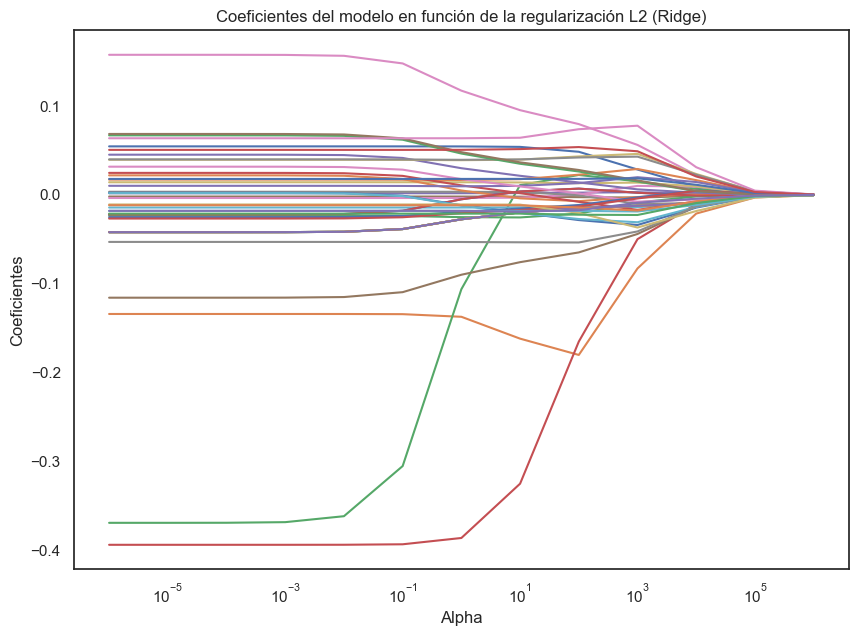

In [45]:
# Evolución de los coeficientes en función de alpha

alphas = ridge_alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización L2 (Ridge)');
plt.axis('tight')
plt.show()

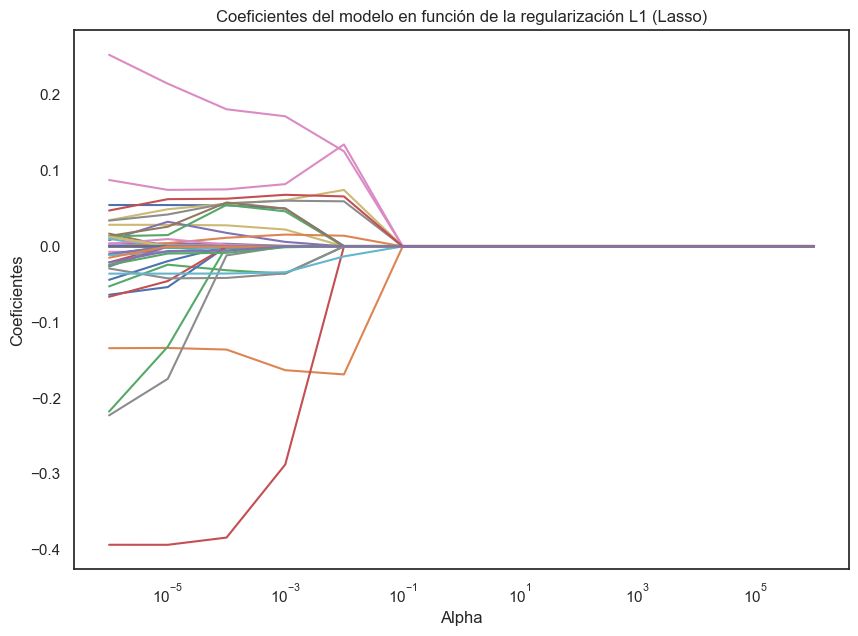

In [46]:
# Evolución de los coeficientes en función de alpha

alphas = lasso_alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización L1 (Lasso)');
plt.axis('tight')
plt.show()

In [47]:
# Entrenar los modelos
ridge_model = train_ridge(X_train, y_train, best_ridge_alpha)
lasso_model = train_lasso(X_train, y_train, best_lasso_alpha)
elasticnet_model = train_elasticnet(X_train, y_train, best_elasticnet_alpha, best_elasticnet_l1_ratio)

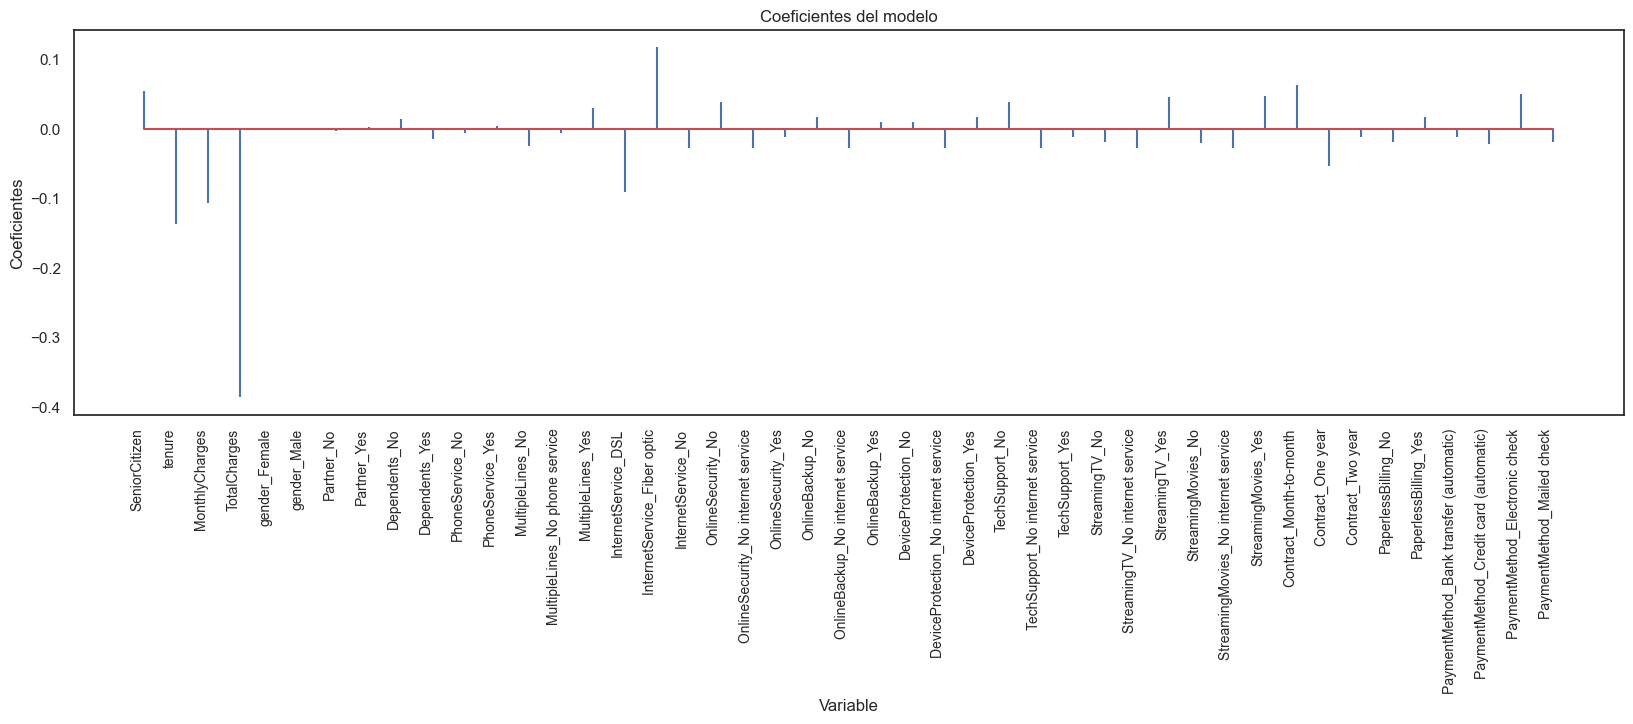

In [48]:
# Coeficientes del modelo
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': ridge_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

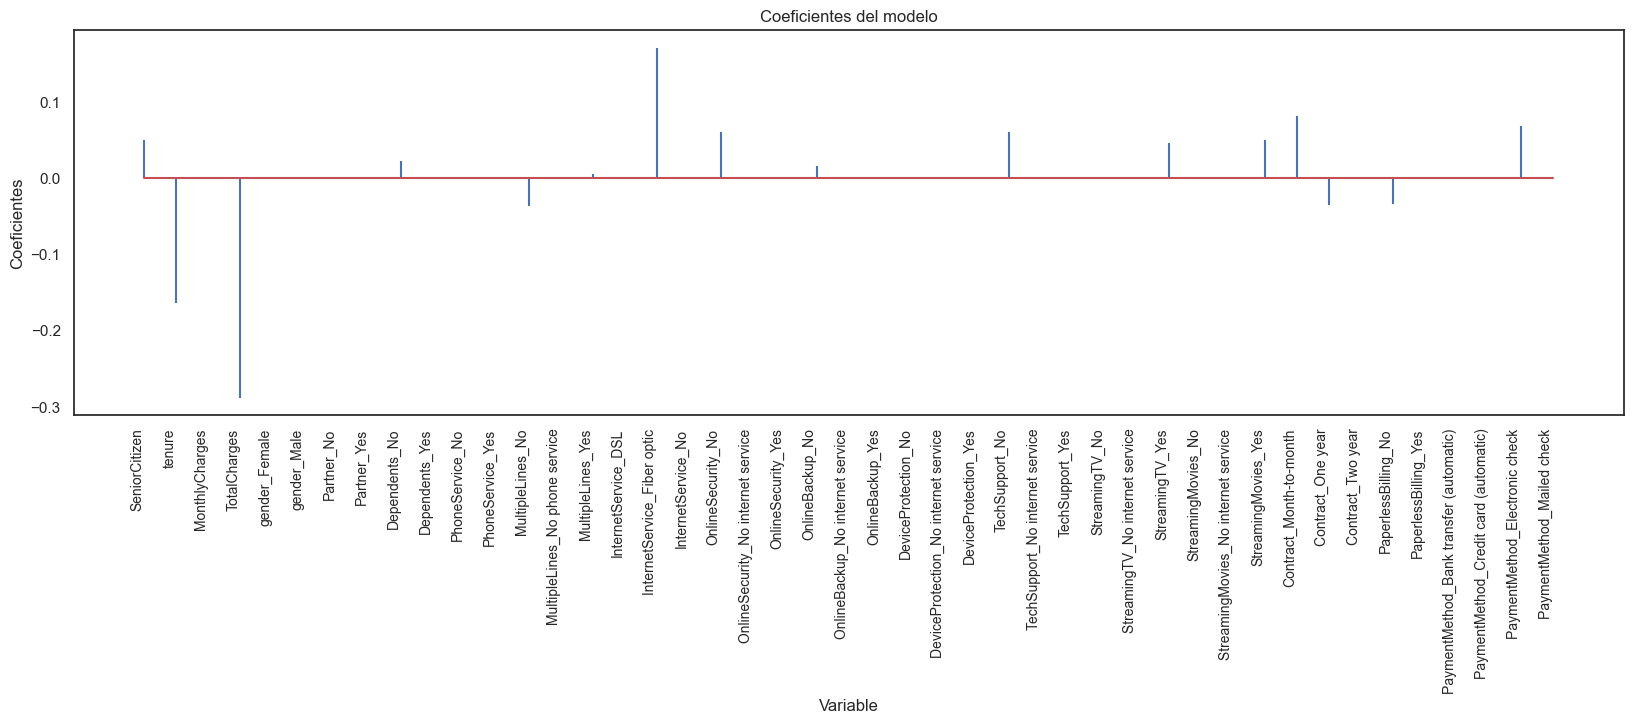

In [49]:
# Coeficientes del modelo
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lasso_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

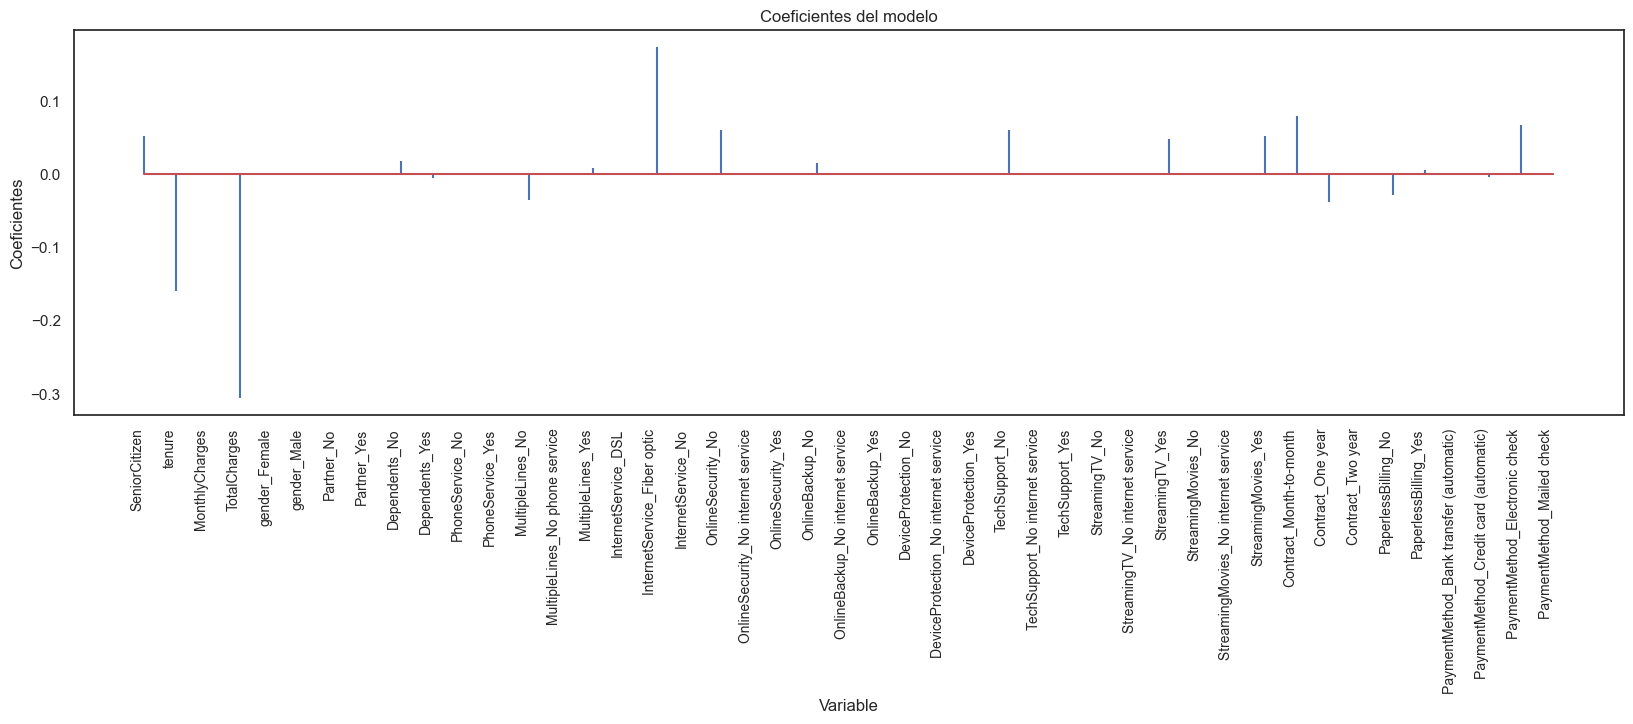

In [50]:
# Coeficientes del modelo
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': elasticnet_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

In [51]:
# Evaluar los modelos
ridge_pred = ridge_model.predict(X_test) > 0.5
lasso_pred = lasso_model.predict(X_test) > 0.5
elasticnet_pred = elasticnet_model.predict(X_test) > 0.5

In [52]:
resultados = pd.concat([pd.DataFrame([calculate_metrics(y_test, ridge_pred, threshold=0.5)]),
          pd.DataFrame([calculate_metrics(y_test, lasso_pred, threshold=0.5)]),
          pd.DataFrame([calculate_metrics(y_test, elasticnet_pred, threshold=0.5)])]
          ).T
resultados.columns = ['Rigde','Lasso','ElasticNet']

In [53]:
resultados

,Rigde,Lasso,ElasticNet
AUC,0.696135,0.694913,0.694913
Gini,0.392269,0.389826,0.389826
F1-score,0.556732,0.554878,0.554878
Recall,0.491979,0.486631,0.486631
